# IMPORTING LIBRARIES TO USE

In [39]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings







# LOADING THE DATASET

In [5]:
#loading and reading the data
df=pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# DATA UNDERSTANDING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#check for statistical description of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#check for duplicated data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

# EXPLORATORY  DATA  ANALYSIS

## Univariate Analysis

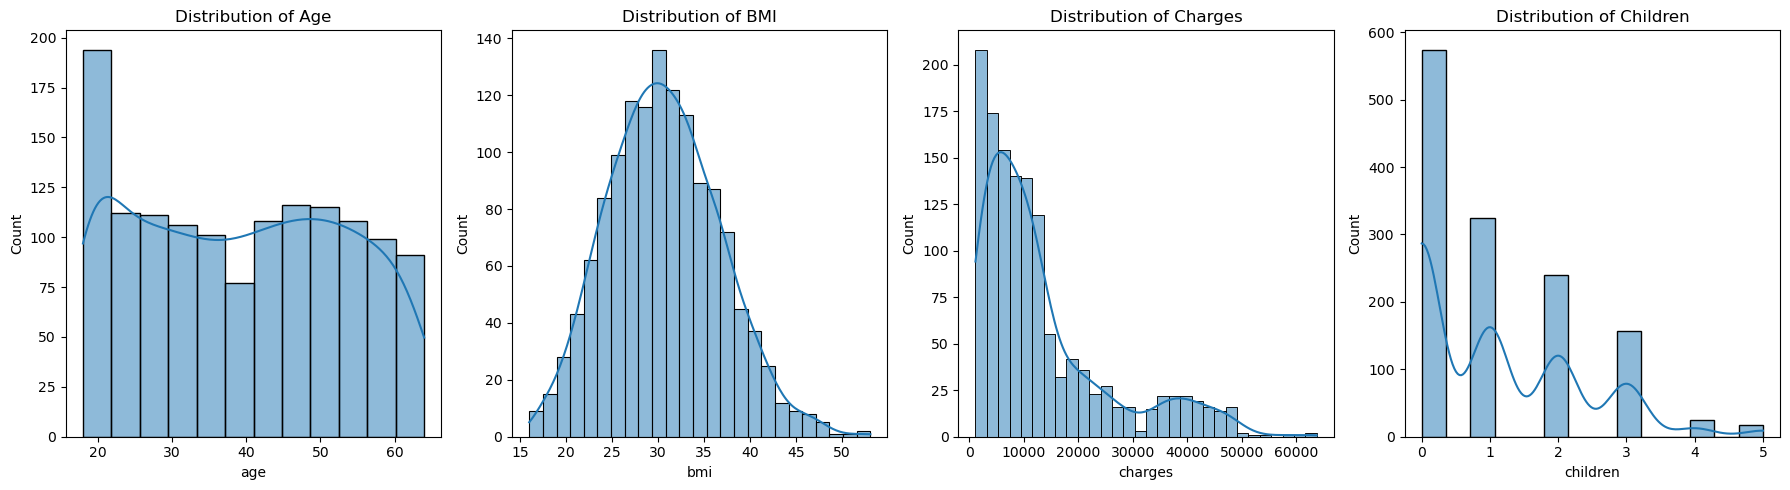

In [10]:
# histograms to visualize the distribution of numerical features like age, bmi,children and charges


# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

#  'age'
sns.histplot(data=df, x='age', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

#  'bmi'
sns.histplot(data=df, x='bmi', kde=True, ax=axes[1])
axes[1].set_title('Distribution of BMI')

#  'charges'
sns.histplot(data=df, x='charges', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Charges')

#  'children'
sns.histplot(data=df, x='children', kde=True, ax=axes[3])
axes[3].set_title('Distribution of Children')

# display the plots
plt.tight_layout()
plt.show()


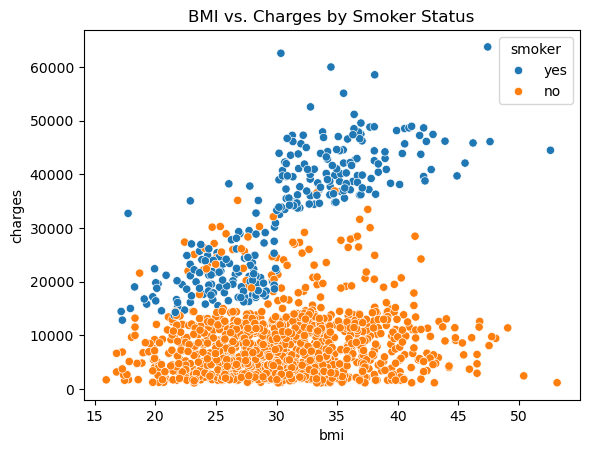

In [11]:
## Bivariate Analysis for categorical variables
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs. Charges by Smoker Status')
plt.show()


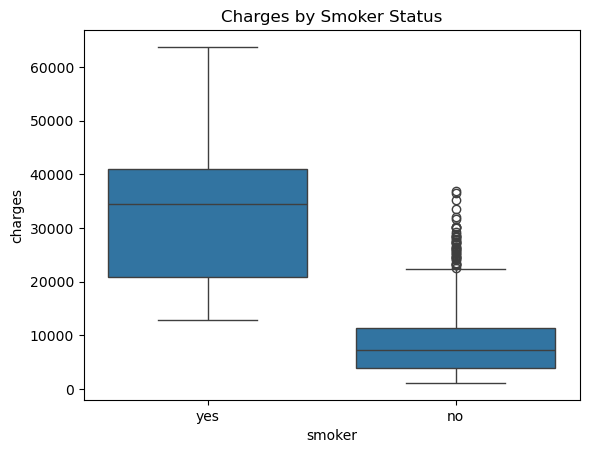

In [12]:
# smoker vs charger...does the smoking status affect how much you are charged for insurance
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker Status')
plt.show()


## Comparing charges for different categories

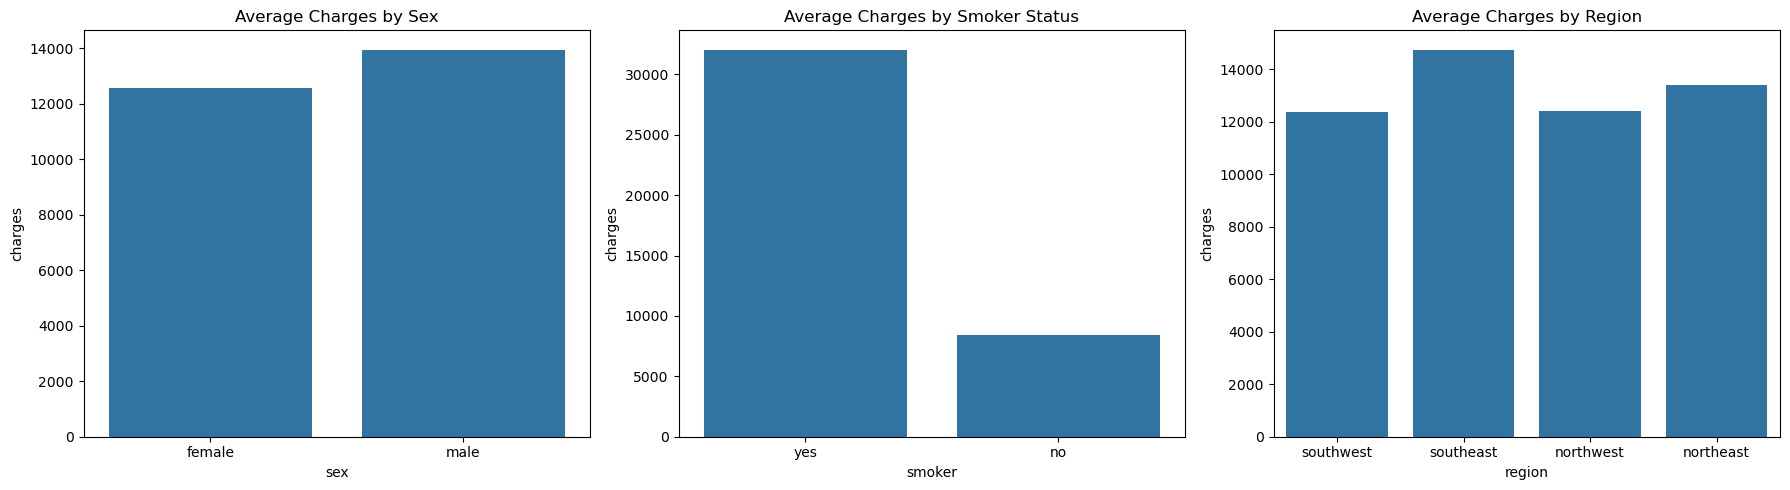

In [13]:
#bar charts to compare the average charges for different categories such as sex, smoker, and region

# Set the figure size for all plots
plt.figure(figsize=(18, 5))

# Plot average charges by sex
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='sex', y='charges', errorbar=None)
plt.title('Average Charges by Sex')

# Plot average charges by smoker status
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='smoker', y='charges', errorbar=None)
plt.title('Average Charges by Smoker Status')

# Plot average charges by region
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='region', y='charges', errorbar=None)
plt.title('Average Charges by Region')

# Adjust layout
plt.tight_layout()
plt.show()


## Facet Grid for All Features vs. Charges

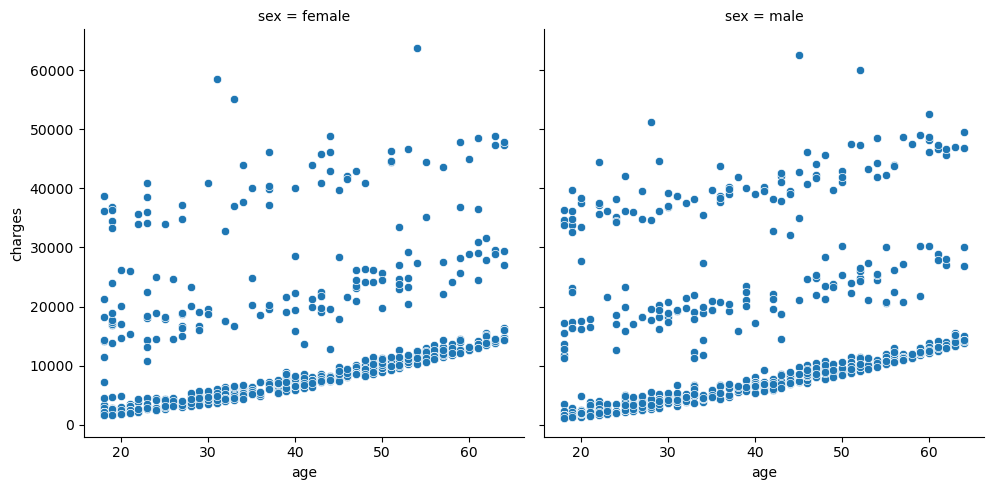

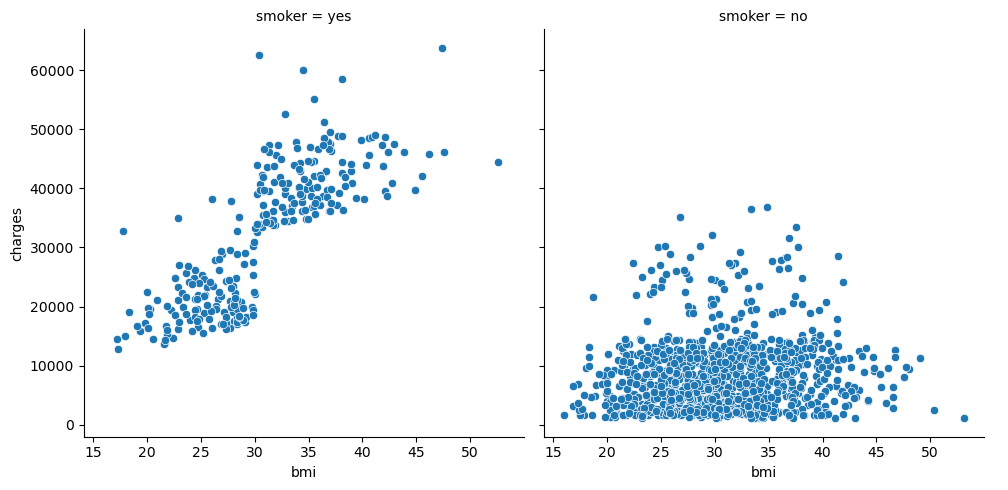

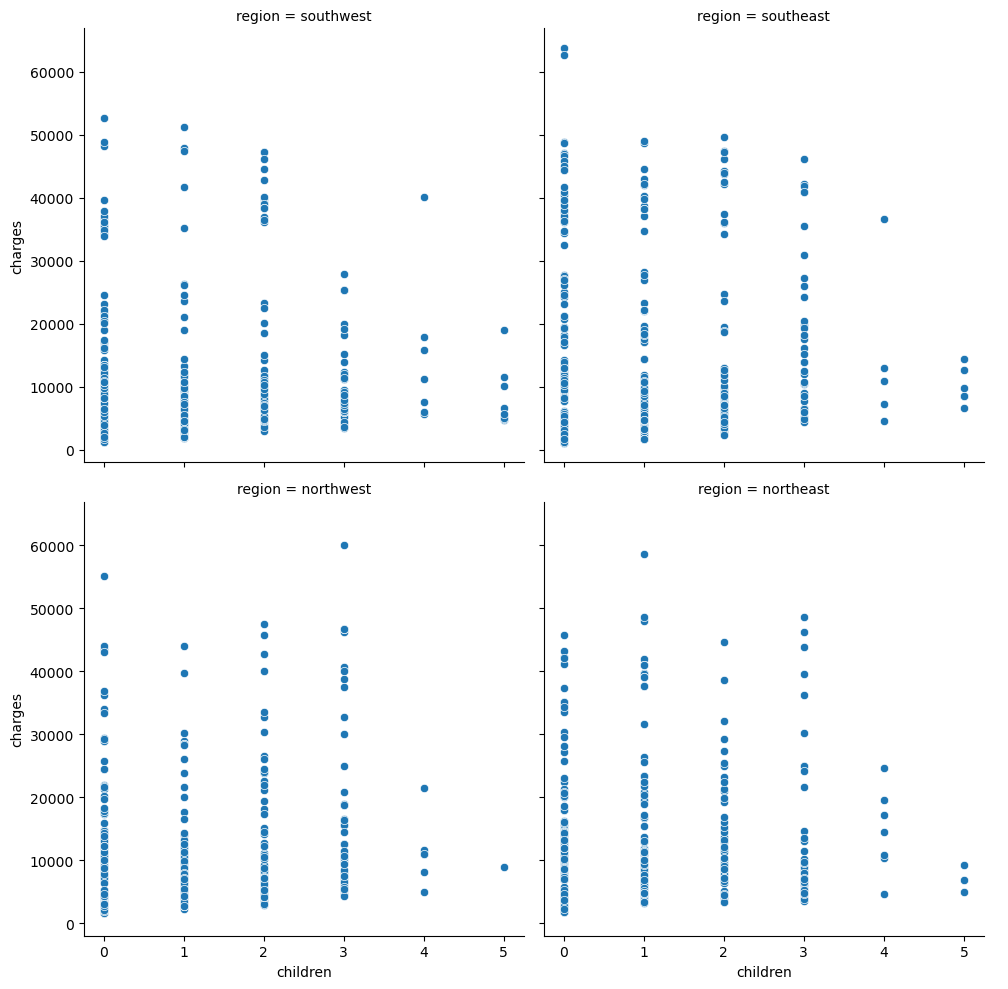

In [14]:
# Age vs. Charges by Sex
g = sns.FacetGrid(df, col="sex", height=5)
g.map(sns.scatterplot, "age", "charges")
g.add_legend()
plt.show()

# BMI vs. Charges by Smoker
g = sns.FacetGrid(df, col="smoker", height=5)
g.map(sns.scatterplot, "bmi", "charges")
g.add_legend()
plt.show()

# Children vs. Charges by Region
g = sns.FacetGrid(df, col="region", height=5, col_wrap=2)
g.map(sns.scatterplot, "children", "charges")
g.add_legend()
plt.show()


# DATA PRE-PROCESSING

In [15]:
# convert categorical variables into categories for memory optimization and performance improvement 
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')


## Encoding categorical variables


In [16]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


## Feature Scaling

In [17]:
scaler = StandardScaler()
df[['age', 'bmi', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'charges']])


## Detecting and handling Outliers

In [18]:
# Detect outliers using Z-score
z_scores = np.abs(scaler.fit_transform(df[['bmi', 'charges']]))
df = df[(z_scores < 3).all(axis=1)]


## Feature Engineering

In [19]:
# Create an interaction term between 'bmi' and 'smoker_yes'
df['bmi_smoker_interaction'] = df['bmi'] * df['smoker_yes']
"""
An interaction term helps capture relationships between two variables that might not be obvious when looking at them individually. In this case, it's used to analyze how BMI and smoking together affect the target variable (e.g., insurance charges) rather than just their individual effects.

"""


"\nAn interaction term helps capture relationships between two variables that might not be obvious when looking at them individually. In this case, it's used to analyze how BMI and smoking together affect the target variable (e.g., insurance charges) rather than just their individual effects.\n\n"

In [20]:
#now let's see what our dataframe looks like after preprocessing
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_smoker_interaction
0,-1.438764,-0.453320,0,0.298584,False,True,False,False,True,-0.45332
1,-1.509965,0.509621,1,-0.953689,True,False,False,True,False,0.00000
2,-0.797954,0.383307,3,-0.728675,True,False,False,True,False,0.00000
3,-0.441948,-1.305531,0,0.719843,True,False,True,False,False,-0.00000
4,-0.513149,-0.292556,0,-0.776802,True,False,True,False,False,-0.00000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1327 non-null   float64
 1   bmi                     1327 non-null   float64
 2   children                1327 non-null   int64  
 3   charges                 1327 non-null   float64
 4   sex_male                1327 non-null   bool   
 5   smoker_yes              1327 non-null   bool   
 6   region_northwest        1327 non-null   bool   
 7   region_southeast        1327 non-null   bool   
 8   region_southwest        1327 non-null   bool   
 9   bmi_smoker_interaction  1327 non-null   float64
dtypes: bool(5), float64(4), int64(1)
memory usage: 68.7 KB


# BUILDING A BASELINE MODEL

## LinearRegression Model

In [22]:
# Define features (X) and target (y)
X = df.drop(columns=['charges'])
y = df['charges']



In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize the Linear Regression model
model = LinearRegression()




In [25]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred


array([ 0.53313222,  0.98125489, -0.64848831, -0.15286824,  0.11673757,
       -0.98734202, -0.42082467, -0.55874049, -0.70212657,  1.21848441,
       -0.82860269,  2.12136369, -0.79428715, -0.83391016, -0.90654128,
       -0.58869215, -0.73076884, -0.59896664, -0.18423745,  0.22565999,
       -0.20954424, -0.85571559, -0.31897885,  0.09643214, -0.88202116,
       -0.63005602, -0.29878013, -0.33593065, -0.49141374,  1.74284523,
       -0.02824096,  1.43351885, -0.1782271 , -0.99748951, -0.75431006,
       -0.69615192, -0.45952126,  0.53028195, -0.88581041, -0.66694372,
        1.82790828, -0.58613101, -0.39896065,  1.34803729, -0.57604981,
       -0.48018837, -0.88916984, -0.93171293, -0.19337114,  0.10517245,
        0.01409086, -0.18741511, -0.09543421, -0.88315851,  0.16378559,
        1.59378415, -0.30686501,  0.89084254, -0.16840385, -0.80179141,
       -0.0656017 , -0.58413854, -0.09303176, -0.98232529,  1.26166336,
       -0.19120714,  0.16471097, -0.57297283, -0.85259527, -0.44

In [28]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 0.23155791338217382
Mean Squared Error (MSE): 0.16404937667783162
Root Mean Squared Error (RMSE): 0.4050300935459384
R-squared (R2): 0.8310017048698182


Mean Absolute Error (MAE): This measures the average magnitude of errors in your predictions, without considering their direction. An MAE of 0.2316 suggests that, on average, your model's predictions are off by about 0.2316 (in normalized charges) from the actual values.

Mean Squared Error (MSE): This is the average of the squares of the errors. It gives more weight to larger errors. An MSE of 0.1640 means the average squared difference between predicted and actual values is 0.1640.

Root Mean Squared Error (RMSE): This is the square root of the MSE and provides an error metric in the same units as the original data. An RMSE of 0.4050 shows that your model's predictions deviate from actual values by approximately 0.4050.

R-squared (R2): This indicates how well your model explains the variability of the target variable. An R-squared of 0.8310 means that your model explains 83.1% of the variance in the charges, which is quite good!

In [33]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                        Coefficient
age                        0.315668
bmi                        0.006950
children                   0.047247
sex_male                  -0.039121
smoker_yes                 1.941374
region_northwest          -0.078964
region_southeast          -0.100830
region_southwest          -0.128892
bmi_smoker_interaction     0.696347


### Interpretation of Coefficients

age (0.315668): For each additional year of age, the charges increase by approximately 0.316 units, holding all other features constant.

bmi (0.006950): For each one-unit increase in BMI, the charges increase by approximately 0.007 units, holding all other features constant.

children (0.047247): For each additional child, the charges increase by approximately 0.047 units, holding all other features constant.

sex_male (-0.039121): Being male reduces the charges by approximately 0.039 units compared to being female, holding all other features constant.

smoker_yes (1.941374): Being a smoker increases the charges by approximately 1.941 units compared to a non-smoker, holding all other features constant. This is a significant impact.

region_northwest (-0.078964): Living in the northwest reduces the charges by approximately 0.079 units compared to the reference category (probably northeast or a similar category), holding all other features constant.

region_southeast (-0.100830): Living in the southeast reduces the charges by approximately 0.101 units compared to the reference category, holding all other features constant.

region_southwest (-0.128892): Living in the southwest reduces the charges by approximately 0.129 units compared to the reference category, holding all other features constant.

bmi_smoker_interaction (0.696347): This interaction term shows that for smokers, each one-unit increase in BMI increases the charges by approximately 0.696 units more than it does for non-smokers, holding all other features constant.

## RandomForestClassifier for comparison

In [30]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = rf.predict(X_test)
y_pred

array([ 0.64051311,  0.45089994, -0.6403324 , -0.21044599,  0.34061458,
       -0.98784541, -0.08708764, -0.70565117, -0.67109255,  1.17860809,
       -0.86103101,  2.31858049, -0.8924462 , -0.87941988, -0.92123601,
       -0.63935337, -0.39717557, -0.72517303, -0.20749795,  0.15450116,
       -0.33173159, -0.87517067, -0.46290677,  0.20136879, -0.94526365,
       -0.55489889, -0.53444229, -0.48163342, -0.59071398,  2.05284136,
       -0.1788386 ,  1.8608304 , -0.21575901, -0.99069063, -0.60571918,
       -0.64010077, -0.61322844,  1.03753112, -0.91274138, -0.59570441,
        1.98642469, -0.73045253, -0.55847555,  1.12541109, -0.70417213,
       -0.075994  , -0.95560758, -0.94187714, -0.35506961,  0.35665256,
       -0.10761061, -0.26631396, -0.19829998, -0.92048606,  0.08348266,
        1.22527513, -0.34599247,  0.86361199, -0.19576616, -0.46751611,
        0.85964083, -0.69801599,  0.03841174, -0.98924163,  1.11689378,
       -0.25121218,  0.26751857, -0.73269621, -0.85057808, -0.46

In [32]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 0.2183251722483641
Mean Squared Error (MSE): 0.17358429304262168
Root Mean Squared Error (RMSE): 0.41663448374159057
R-squared (R2): 0.8211791463054969


Both models are performing quite well but the Linear Regression model shows a slight edge in terms of MSE, RMSE, and R-squared values. On the other hand, the Random Forest model has a marginally lower MAE.

These results suggest that the Linear Regression model might be more consistent overall, while the Random Forest model might have fewer average errors but slightly larger deviations in some cases. Depending on your specific needs and goals, you could choose to further tune and optimize either model or explore other advanced techniques.

## Let us do hyperparameter tuning

To find the best combination of parameters. We'll use Grid Search with Cross-Validation to  explore different combinations of hyperparameters.

In [36]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [37]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [40]:
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


C:\Users\Lenovo\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
407 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parame

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [41]:
# Use the best parameters to build a new model
rf_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)
y_pred_optimized = rf_optimized.predict(X_test)


In [42]:
# Calculate evaluation metrics
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae_optimized}')
print(f'Mean Squared Error (MSE): {mse_optimized}')
print(f'Root Mean Squared Error (RMSE): {rmse_optimized}')
print(f'R-squared (R2): {r2_optimized}')


Mean Absolute Error (MAE): 0.19913310367189854
Mean Squared Error (MSE): 0.143615966148092
Root Mean Squared Error (RMSE): 0.3789669723710656
R-squared (R2): 0.852051535190129
